In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [3]:
# concatenation of both files 
# df_train = pd.read_csv('extracted_features_hog_95.csv',header=None)

# df_train = df_train.astype(str)


# # Convert all columns to string type
# df_train[0]=df_train[0].str.split(',',expand=True)
# # print(df)


# df_test = pd.read_csv('extracted_features_test_hog_95.csv',header=None)


# df_test = df_test.astype(str)

# # Convert all columns to string type
# df_test[0]=df_test[0].str.split(',',expand=True)

# # print(df_test)


# df=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

# print(df.shape)




(13233, 3249)


In [4]:
df = pd.read_csv('hog_95(complete).csv',header=None)
print(df.shape)

# df = df.astype(str)

(13234, 3249)


In [5]:
n_c=df[0].value_counts()

In [9]:
print(n_c)

0
George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
                    ... 
Didier_Defago          1
Hal_McCoy              1
Abba_Eban              1
Olivera_Labus          1
Mitzi_Gaynor           1
Name: count, Length: 5750, dtype: int64


In [6]:
mask = n_c[(n_c >= 10) & (n_c <= 50)]

# Extract the person identifiers from the selected people
selected_person_ids = mask.index.tolist()

# Filter the original DataFrame based on selected person identifiers
df_10_50 = df[df[0].isin(selected_person_ids)]

In [8]:
filtered_name_counts=n_c[(n_c >= 10) & (n_c <= 50)]
sorted_filtered_names_counts=filtered_name_counts.sort_values(ascending=False)
print(sorted_filtered_names_counts)
print(len(sorted_filtered_names_counts))

0
Vladimir_Putin               49
Luiz_Inacio_Lula_da_Silva    48
Gloria_Macapagal_Arroyo      44
Jennifer_Capriati            42
Arnold_Schwarzenegger        42
                             ..
Ian_Thorpe                   10
Tom_Cruise                   10
Tom_Hanks                    10
Bill_McBride                 10
Javier_Solana                10
Name: count, Length: 146, dtype: int64
146


In [13]:
X=df_10_50.iloc[:, 1:]
y=df_10_50.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(2211, 3248)

In [9]:
y_train[:10]

7220           Hugo_Chavez
10438        George_W_Bush
13180      Donald_Rumsfeld
6605          Colin_Powell
10861           Tony_Blair
7326          Colin_Powell
12138           Tony_Blair
4728          Colin_Powell
5283     Junichiro_Koizumi
10296         Colin_Powell
Name: 0, dtype: object

In [14]:
scaler=StandardScaler()
X_train_arr=X_train.values
X_test_arr=X_test.values
X_train_scaled=scaler.fit_transform(X_train_arr)
X_test_scaled = scaler.transform(X_test_arr)

In [18]:
print(X_train.shape)

(2211, 3248)


In [64]:
# X_train_arr.shape

(228, 3248)

In [23]:
def model(X_train, i, featr, param_type=None):
    
    # Splitting X_train into training and validation subsets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    if param_type == 'max_depth':
        clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    elif param_type == 'min_samples_split':
        clf = DecisionTreeClassifier(min_samples_split=i, random_state=42)
    elif param_type == 'min_samples_leaf':
        clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    elif param_type == 'max_leaf_nodes':
        clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=42)
    else:
        clf = DecisionTreeClassifier(max_depth=None, random_state=42)
    
    clf.fit(X_train_sub, y_train_sub)

    # Predict on the validation data
    y_val_pred = clf.predict(X_val)

    # Compute accuracy on validation data
    accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Accuracy using feature of {featr}:", accuracy)

    tree_depth = clf.tree_.max_depth

    print("Depth of the decision tree:", tree_depth)


    # joblib.dump(clf,f'{featr}.joblib')  ## not saving the model ##

In [20]:
# find the max_depth
model(X_train_scaled,None,'test')

Accuracy using feature of test: 0.10158013544018059
Depth of the decision tree: 80


In [21]:
# for max_depth idea
for i in range(1,80,4):
    model(X_train_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of max_depth_5: 0.06772009029345373
Depth of the decision tree: 5
Accuracy using feature of max_depth_9: 0.09255079006772009
Depth of the decision tree: 9
Accuracy using feature of max_depth_13: 0.10158013544018059
Depth of the decision tree: 13
Accuracy using feature of max_depth_17: 0.11512415349887133
Depth of the decision tree: 17
Accuracy using feature of max_depth_21: 0.11060948081264109
Depth of the decision tree: 21
Accuracy using feature of max_depth_25: 0.10835214446952596
Depth of the decision tree: 25
Accuracy using feature of max_depth_29: 0.09932279909706546
Depth of the decision tree: 29
Accuracy using feature of max_depth_33: 0.11963882618510158
Depth of the decision tree: 33
Accuracy using feature of max_depth_37: 0.09706546275395034
Depth of the decision tree: 37
Accuracy using feature of max_depth_41: 0.09480812641083522
Depth of the decision tree: 41
Accu

In [23]:
for i in range(2,2211,100):
        model(X_train_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 102: 0.09706546275395034
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 202: 0.10835214446952596
Depth of the decision tree: 28
Accuracy using feature of max_leaf_node 302: 0.11060948081264109
Depth of the decision tree: 65
Accuracy using feature of max_leaf_node 402: 0.11512415349887133
Depth of the decision tree: 68
Accuracy using feature of max_leaf_node 502: 0.10835214446952596
Depth of the decision tree: 70
Accuracy using feature of max_leaf_node 602: 0.10835214446952596
Depth of the decision tree: 70
Accuracy using feature of max_leaf_node 702: 0.10835214446952596
Depth of the decision tree: 75
Accuracy using feature of max_leaf_node 802: 0.10835214446952596
Depth of the decision tree: 78
Accuracy using feature of max_leaf_node 902: 0.10835214446952596
Depth of the decision tree: 80
Accuracy using feature of max_leaf_node 10

In [24]:
# for min_sample_split
for i in range(2,2211,100):
    model(X_train_scaled,i,f'min_sample_split {i}','min_samples_split')

Accuracy using feature of min_sample_split 2: 0.10158013544018059
Depth of the decision tree: 80
Accuracy using feature of min_sample_split 102: 0.11512415349887133
Depth of the decision tree: 51
Accuracy using feature of min_sample_split 202: 0.10609480812641084
Depth of the decision tree: 26
Accuracy using feature of min_sample_split 302: 0.08803611738148984
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 402: 0.060948081264108354
Depth of the decision tree: 9
Accuracy using feature of min_sample_split 502: 0.056433408577878104
Depth of the decision tree: 6
Accuracy using feature of min_sample_split 602: 0.056433408577878104
Depth of the decision tree: 6
Accuracy using feature of min_sample_split 702: 0.056433408577878104
Depth of the decision tree: 6
Accuracy using feature of min_sample_split 802: 0.04288939051918736
Depth of the decision tree: 5
Accuracy using feature of min_sample_split 902: 0.040632054176072234
Depth of the decision tree: 4
Accuracy usin

In [25]:
# min_samples_leaf
for i in range(1,2211,100):
    model(X_train_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.10158013544018059
Depth of the decision tree: 80
Accuracy using feature of min_samples_leaf101: 0.09932279909706546
Depth of the decision tree: 8
Accuracy using feature of min_samples_leaf201: 0.07223476297968397
Depth of the decision tree: 6
Accuracy using feature of min_samples_leaf301: 0.03611738148984198
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf401: 0.04966139954853273
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf501: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf601: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf701: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf801: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf901: 0.013544018058690745
Depth of the decision tree: 0
Accuracy using feature of 

In [10]:
# grid decided based on the basis of around values of best accuracies calculated in the domain of possible values now going around that values to find the best hyperparameter
def tuning_model(X_train,featr,param_grid):
    clf = DecisionTreeClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    cv_results = grid_search.cv_results_
    

    print("Grid Search Results: ")


    for i, (rank,mean_score, params) in enumerate(zip(cv_results['rank_test_score'],cv_results["mean_test_score"], cv_results["params"]), start=1):
        print(f"{i}). Rank_score: {rank}, Mean accuracy: {mean_score:.3f}, Parameters: {params}")
    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Print the best score
    print("Best Score:", grid_search.best_score_)

    # Save the best trained model using joblib
    best_clf = grid_search.best_estimator_

    
    joblib.dump(best_clf, f"tuned_dt_{featr}.joblib")

    return cv_results,best_clf

In [16]:
param_grid = {
        'max_depth': [40,45,52,55],
        'max_leaf_nodes':[280,300,320,340,380],
        'min_samples_split': [80,100,120,140],
        'min_samples_leaf': [70,90,100,120],
        
    }


In [17]:
cv_results,best_clf=tuning_model(X_train_scaled,'conc_10_50_gd',param_grid)

Grid Search Results: 
1). Rank_score: 1, Mean accuracy: 0.113, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf': 70, 'min_samples_split': 80}
2). Rank_score: 1, Mean accuracy: 0.113, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf': 70, 'min_samples_split': 100}
3). Rank_score: 1, Mean accuracy: 0.113, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf': 70, 'min_samples_split': 120}
4). Rank_score: 1, Mean accuracy: 0.113, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf': 70, 'min_samples_split': 140}
5). Rank_score: 81, Mean accuracy: 0.102, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf': 90, 'min_samples_split': 80}
6). Rank_score: 81, Mean accuracy: 0.102, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf': 90, 'min_samples_split': 100}
7). Rank_score: 81, Mean accuracy: 0.102, Parameters: {'max_depth': 40, 'max_leaf_nodes': 280, 'min_samples_leaf':

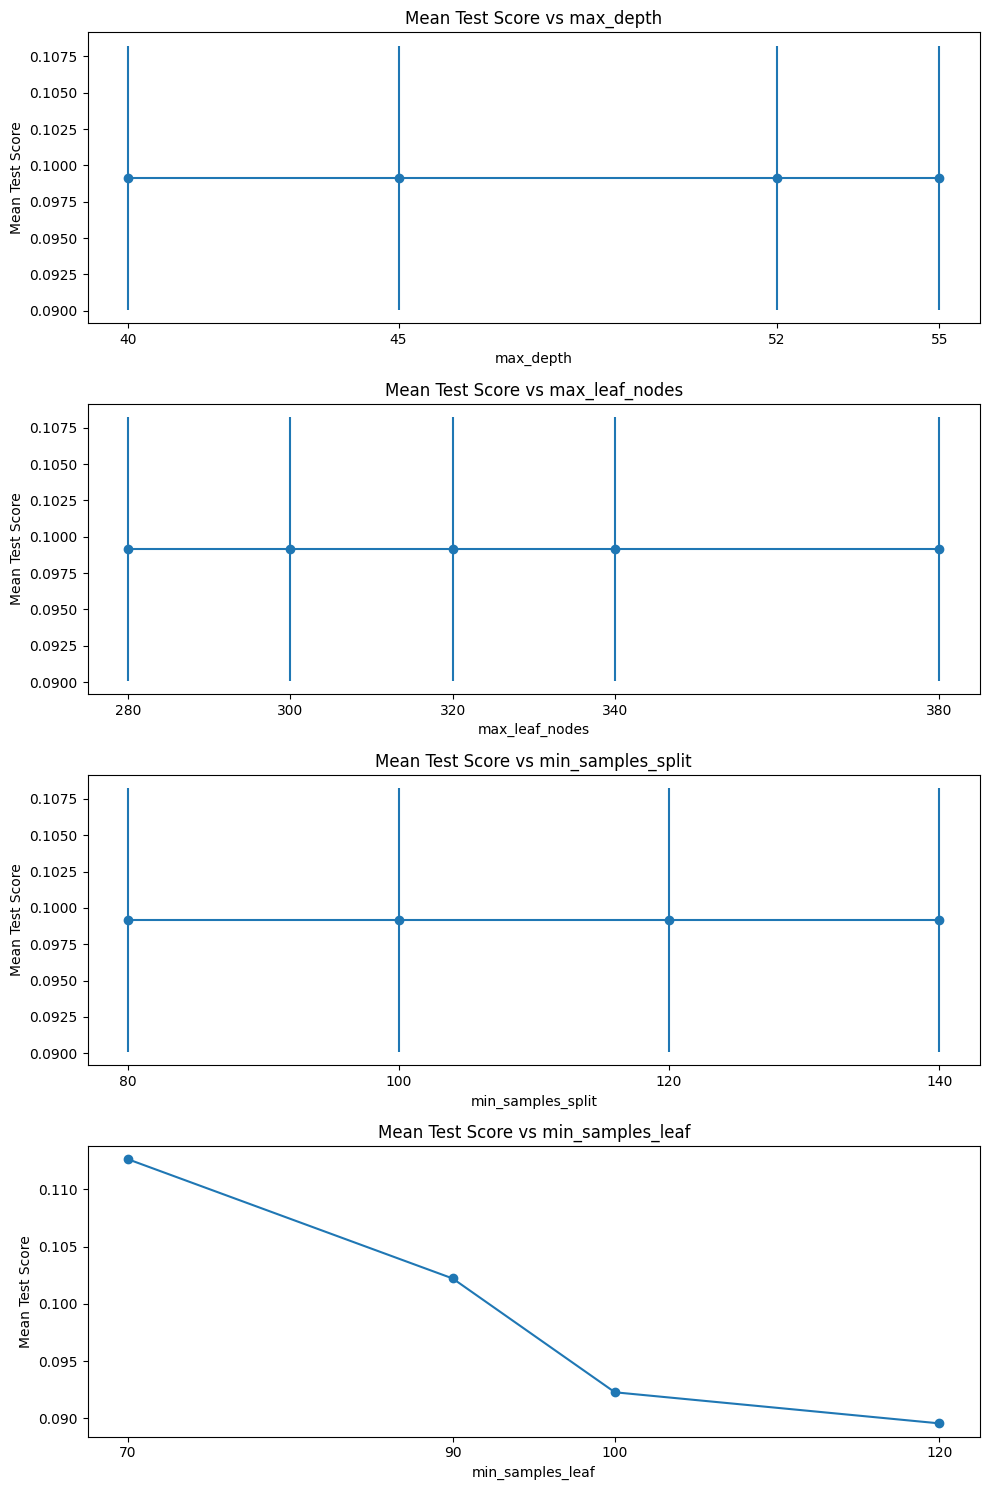

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


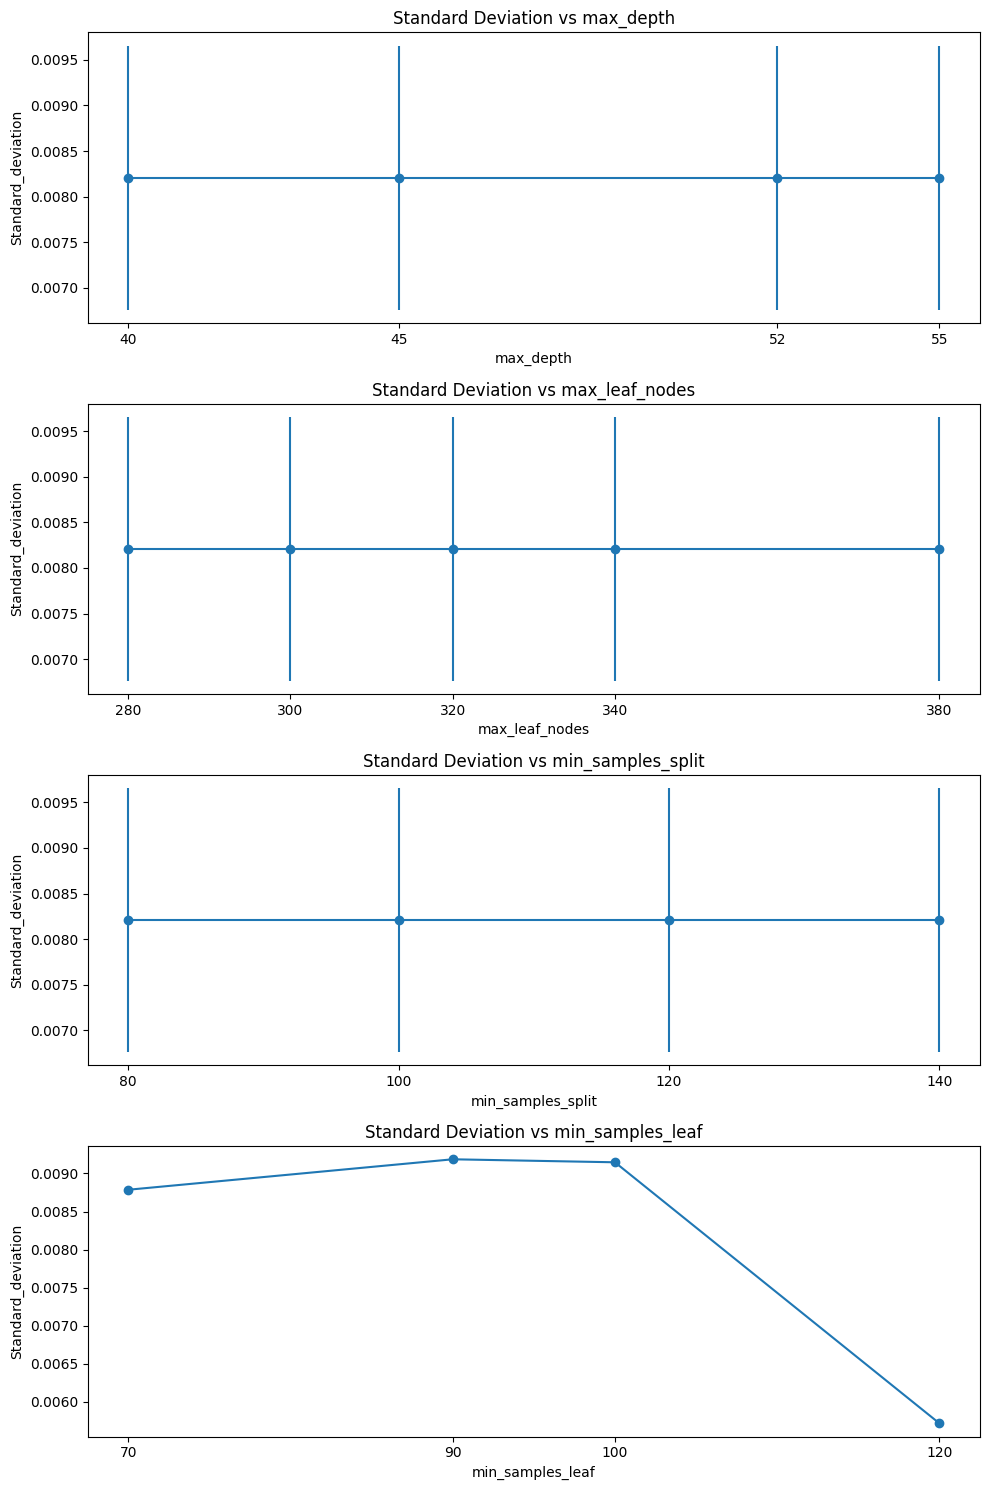

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [20]:
y_pred = best_clf.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on X_test:", accuracy)

Accuracy on X_test: 0.09764918625678119


In [ ]:
# for plotting graphs for correct predictions

# folder='saved_models_dt'
# loaded_clf=joblib.load(f'{folder}/min_img/20/conc_20_d10_ms4.joblib')

# y_pred_loaded=loaded_clf.predict(X_test)  #be careful here which model's X_test is there

# indices=np.where(y_pred_loaded==y_test)[0]
# y_pred_correct=y_pred_loaded[indices]


# df_correct = pd.DataFrame({
#     'y_correct': y_pred_correct,
    
# })


# unique_classes_count = df_correct['y_correct'].value_counts()

# plt.figure(figsize=(10, 6))
# unique_classes_count.plot(kind='bar', color='skyblue')
# plt.xlabel('Unique Classes')
# plt.ylabel('Count')
# plt.title('Count of Unique Classes Predicted Correctly')
# plt.xticks(rotation=45)
# plt.grid(axis='y')

# plt.show()

In [21]:
X_hog_train=X_train.iloc[:,1:945]
X_hog_test=X_test.iloc[:,1:945]

X_train_hog_arr=X_hog_train.values


X_train_hog_scaled = scaler.fit_transform(X_train_hog_arr)

X_test_hog_arr=X_hog_test.values

X_test_hog_scaled = scaler.transform(X_test_hog_arr)

In [24]:
# Getting the max_depth
model(X_train_hog_scaled,None,'maxdepth')

Accuracy using feature of maxdepth: 0.009029345372460496
Depth of the decision tree: 117


In [25]:
# Got maximum depth of the tree as 20
for i in range(1,117,4):
    model(X_train_hog_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of max_depth_5: 0.033860045146726865
Depth of the decision tree: 5
Accuracy using feature of max_depth_9: 0.022573363431151242
Depth of the decision tree: 9
Accuracy using feature of max_depth_13: 0.024830699774266364
Depth of the decision tree: 13
Accuracy using feature of max_depth_17: 0.020316027088036117
Depth of the decision tree: 17
Accuracy using feature of max_depth_21: 0.02708803611738149
Depth of the decision tree: 21
Accuracy using feature of max_depth_25: 0.024830699774266364
Depth of the decision tree: 25
Accuracy using feature of max_depth_29: 0.01580135440180587
Depth of the decision tree: 29
Accuracy using feature of max_depth_33: 0.024830699774266364
Depth of the decision tree: 33
Accuracy using feature of max_depth_37: 0.01580135440180587
Depth of the decision tree: 37
Accuracy using feature of max_depth_41: 0.013544018058690745
Depth of the decision tree: 

In [26]:
for i in range(2,2211,100):
        model(X_train_hog_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 102: 0.022573363431151242
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 202: 0.020316027088036117
Depth of the decision tree: 31
Accuracy using feature of max_leaf_node 302: 0.013544018058690745
Depth of the decision tree: 52
Accuracy using feature of max_leaf_node 402: 0.006772009029345372
Depth of the decision tree: 65
Accuracy using feature of max_leaf_node 502: 0.006772009029345372
Depth of the decision tree: 72
Accuracy using feature of max_leaf_node 602: 0.011286681715575621
Depth of the decision tree: 75
Accuracy using feature of max_leaf_node 702: 0.009029345372460496
Depth of the decision tree: 75
Accuracy using feature of max_leaf_node 802: 0.011286681715575621
Depth of the decision tree: 75
Accuracy using feature of max_leaf_node 902: 0.011286681715575621
Depth of the decision tree: 75
Accuracy using feature of max_lea

In [27]:
# for min_sample_split
for i in range(2,2211,100):
    model(X_train_hog_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.009029345372460496
Depth of the decision tree: 117
Accuracy using feature of min_samples_split 102: 0.03160270880361174
Depth of the decision tree: 56
Accuracy using feature of min_samples_split 202: 0.040632054176072234
Depth of the decision tree: 32
Accuracy using feature of min_samples_split 302: 0.03837471783295711
Depth of the decision tree: 14
Accuracy using feature of min_samples_split 402: 0.033860045146726865
Depth of the decision tree: 8
Accuracy using feature of min_samples_split 502: 0.03611738148984198
Depth of the decision tree: 8
Accuracy using feature of min_samples_split 602: 0.022573363431151242
Depth of the decision tree: 6
Accuracy using feature of min_samples_split 702: 0.022573363431151242
Depth of the decision tree: 6
Accuracy using feature of min_samples_split 802: 0.029345372460496615
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 902: 0.029345372460496615
Depth of the decision tree: 4


In [28]:
# min_samples_leaf
for i in range(1,2211,100):
    model(X_train_hog_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.009029345372460496
Depth of the decision tree: 117
Accuracy using feature of min_samples_leaf101: 0.033860045146726865
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf201: 0.024830699774266364
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf301: 0.020316027088036117
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf401: 0.03160270880361174
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf501: 0.03160270880361174
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf601: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf701: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf801: 0.022573363431151242
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf901: 0.013544018058690745
Depth of the decision tree: 0
Accuracy using feature

In [29]:
# on analysing the best range I found the following param grid:
param_grid_hog={
    'max_depth': [7,13,19,22,27,31],
    'max_leaf_nodes':[5,20,40,80,90,110],
    'min_samples_split': [150,170,210],
    'min_samples_leaf': [30,50,70,80]
}



In [30]:
cv_results_hog,best_clf_hog=tuning_model(X_train_hog_scaled,'hog__10_50_gd',param_grid_hog)

Grid Search Results: 
1). Rank_score: 397, Mean accuracy: 0.036, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 30, 'min_samples_split': 150}
2). Rank_score: 397, Mean accuracy: 0.036, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 30, 'min_samples_split': 170}
3). Rank_score: 397, Mean accuracy: 0.036, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 30, 'min_samples_split': 210}
4). Rank_score: 415, Mean accuracy: 0.036, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 50, 'min_samples_split': 150}
5). Rank_score: 415, Mean accuracy: 0.036, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 50, 'min_samples_split': 170}
6). Rank_score: 415, Mean accuracy: 0.036, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 50, 'min_samples_split': 210}
7). Rank_score: 361, Mean accuracy: 0.037, Parameters: {'max_depth': 7, 'max_leaf_nodes': 5, 'min_samples_leaf': 70, 'mi

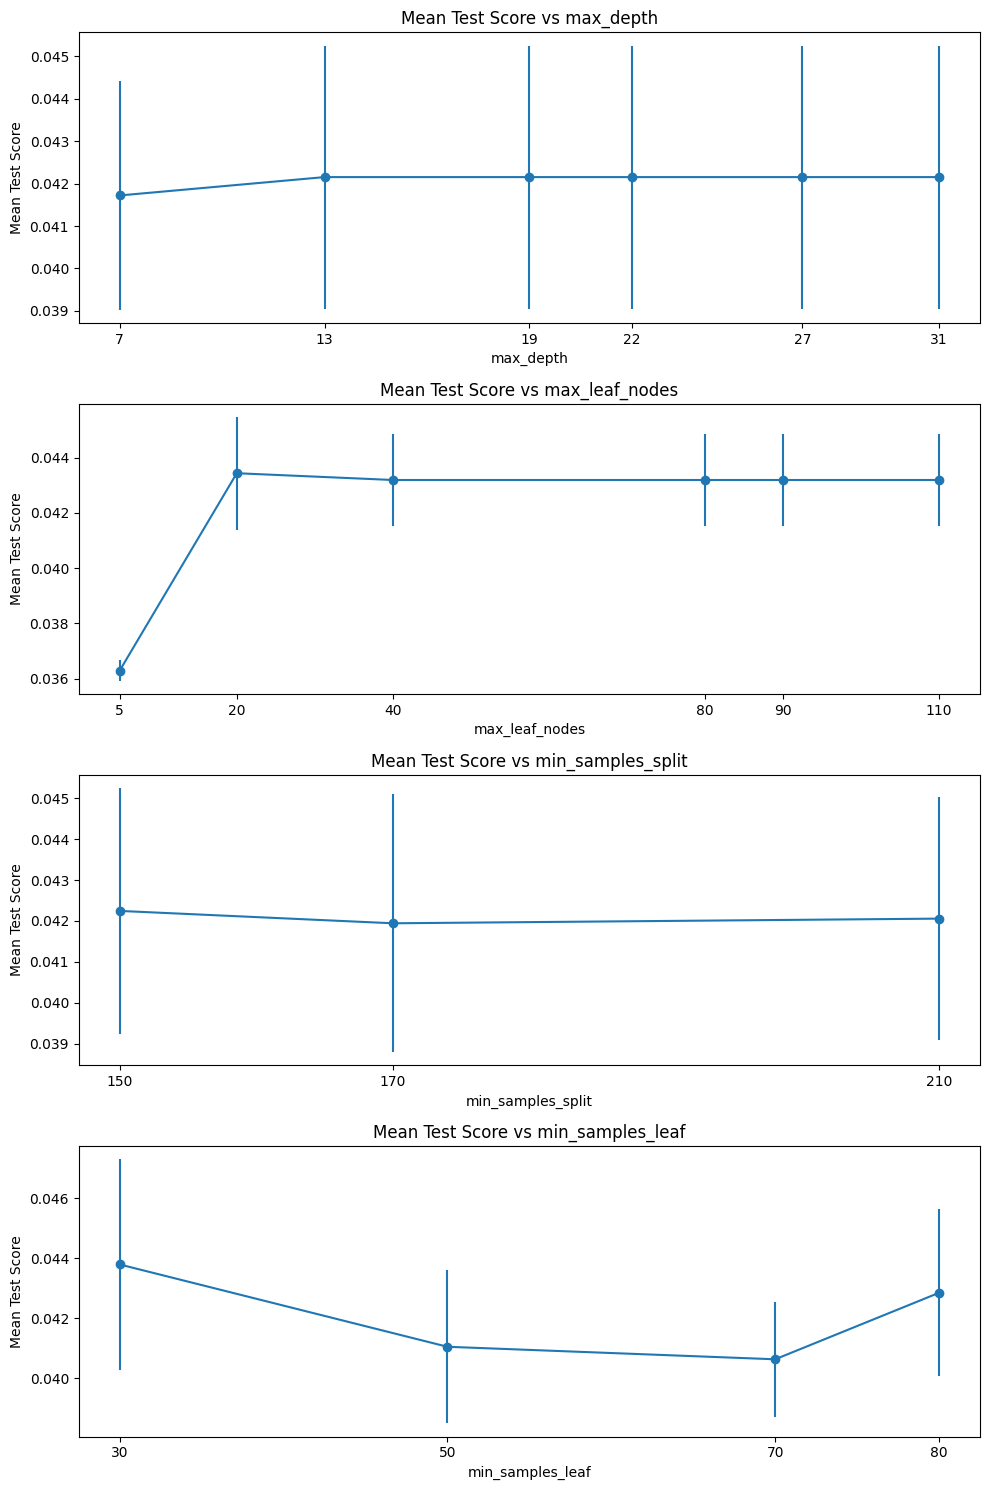

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_hog['mean_test_score']
std_test_scores = cv_results_hog['std_test_score']
params = cv_results_hog['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


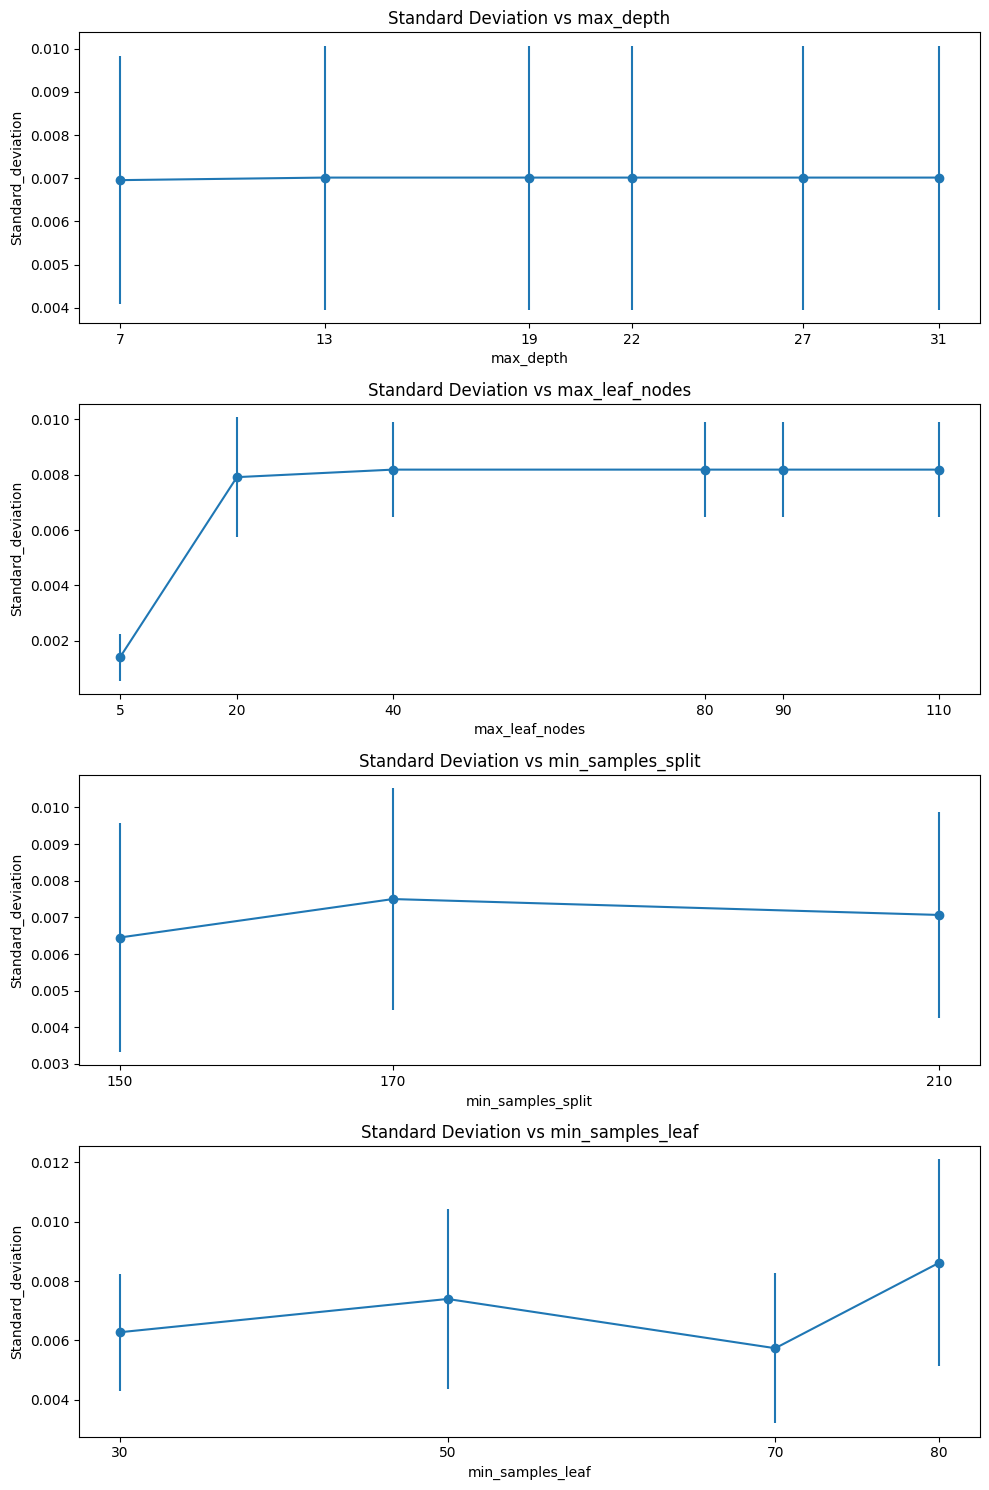

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_hog['std_test_score']
params = cv_results_hog['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [33]:
# Testing on the test data:

y_pred_hog = best_clf_hog.predict(X_test_hog_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_hog)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.0325497287522604


In [34]:
X_cnn_train=X_train.iloc[:,945:2993]
X_train_cnn_arr=X_cnn_train.values
X_train_cnn_scaled = scaler.fit_transform(X_train_cnn_arr)


X_cnn_test=X_test.iloc[:,945:2993]
X_test_cnn_arr=X_cnn_test.values
X_test_cnn_scaled = scaler.transform(X_test_cnn_arr)



In [35]:
# finding the max_depth
model(X_train_cnn_scaled,None,'maxdepth')

Accuracy using feature of maxdepth: 0.13544018058690746
Depth of the decision tree: 76


In [36]:
# Got maximum depth for cnn of the tree as 18
for i in range(1,76,2):
    model(X_train_cnn_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.04966139954853273
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.07674943566591422
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.1038374717832957
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.09932279909706546
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.12189616252821671
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.12189616252821671
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.12866817155756208
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.12189616252821671
Depth of the decision tree: 17
Accuracy using feature of max_depth_19: 0.11963882618510158
Depth of the decision tree: 19
Accuracy using feature of max_depth_21: 0.13769751693002258
Depth of the decision tree: 21
Accuracy 

In [37]:
for i in range(2,2211,50):
        model(X_train_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.024830699774266364
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.10158013544018059
Depth of the decision tree: 10
Accuracy using feature of max_leaf_node 102: 0.09706546275395034
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 152: 0.10835214446952596
Depth of the decision tree: 21
Accuracy using feature of max_leaf_node 202: 0.10835214446952596
Depth of the decision tree: 28
Accuracy using feature of max_leaf_node 252: 0.10835214446952596
Depth of the decision tree: 37
Accuracy using feature of max_leaf_node 302: 0.11060948081264109
Depth of the decision tree: 65
Accuracy using feature of max_leaf_node 352: 0.11286681715575621
Depth of the decision tree: 67
Accuracy using feature of max_leaf_node 402: 0.11512415349887133
Depth of the decision tree: 68
Accuracy using feature of max_leaf_node 452: 0.10609480812641084
Depth of the decision tree: 68
Accuracy using feature of max_leaf_node 502

In [38]:
# for min_sample_split
for i in range(2,2211,50):
    model(X_train_cnn_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.13544018058690746
Depth of the decision tree: 76
Accuracy using feature of min_samples_split 52: 0.1580135440180587
Depth of the decision tree: 62
Accuracy using feature of min_samples_split 102: 0.1309255079006772
Depth of the decision tree: 48
Accuracy using feature of min_samples_split 152: 0.13318284424379231
Depth of the decision tree: 34
Accuracy using feature of min_samples_split 202: 0.10609480812641084
Depth of the decision tree: 27
Accuracy using feature of min_samples_split 252: 0.08803611738148984
Depth of the decision tree: 21
Accuracy using feature of min_samples_split 302: 0.08126410835214447
Depth of the decision tree: 15
Accuracy using feature of min_samples_split 352: 0.06997742663656885
Depth of the decision tree: 11
Accuracy using feature of min_samples_split 402: 0.060948081264108354
Depth of the decision tree: 9
Accuracy using feature of min_samples_split 452: 0.0654627539503386
Depth of the decision tree: 8
Accurac

In [39]:
# min_samples_leaf
for i in range(1,2211,50):
    model(X_train_cnn_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.13544018058690746
Depth of the decision tree: 76
Accuracy using feature of min_samples_leaf51: 0.11512415349887133
Depth of the decision tree: 11
Accuracy using feature of min_samples_leaf101: 0.09932279909706546
Depth of the decision tree: 8
Accuracy using feature of min_samples_leaf151: 0.06772009029345373
Depth of the decision tree: 6
Accuracy using feature of min_samples_leaf201: 0.07223476297968397
Depth of the decision tree: 6
Accuracy using feature of min_samples_leaf251: 0.0654627539503386
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf301: 0.03611738148984198
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf351: 0.04740406320541761
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf401: 0.04966139954853273
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf451: 0.03611738148984198
Depth of the decision tree: 2
Accuracy using feature of min_sa

In [40]:
param_grid_cnn={
    'max_depth': [13,19,24,27,34,39,43,52],
    'max_leaf_nodes':[240,270,290,320,350,380,410],
    'min_samples_split': [40,55,68,74,97,111],
    'min_samples_leaf': [10,18,27,36,41,54,69]
}

In [41]:
cv_results_cnn,best_clf_cnn=tuning_model(X_train_cnn_scaled,'cnn_10_50_gd',param_grid_cnn)

Grid Search Results: 
1). Rank_score: 330, Mean accuracy: 0.143, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 40}
2). Rank_score: 50, Mean accuracy: 0.146, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 55}
3). Rank_score: 162, Mean accuracy: 0.145, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 68}
4). Rank_score: 316, Mean accuracy: 0.143, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 74}
5). Rank_score: 512, Mean accuracy: 0.139, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 97}
6). Rank_score: 554, Mean accuracy: 0.138, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 111}
7). Rank_score: 1786, Mean accuracy: 0.133, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_sample

In [42]:
y_pred_cnn = best_clf_cnn.predict(X_test_cnn_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)

print(f"Accuracy on X_test:", accuracy)

Accuracy on X_test: 0.13924050632911392


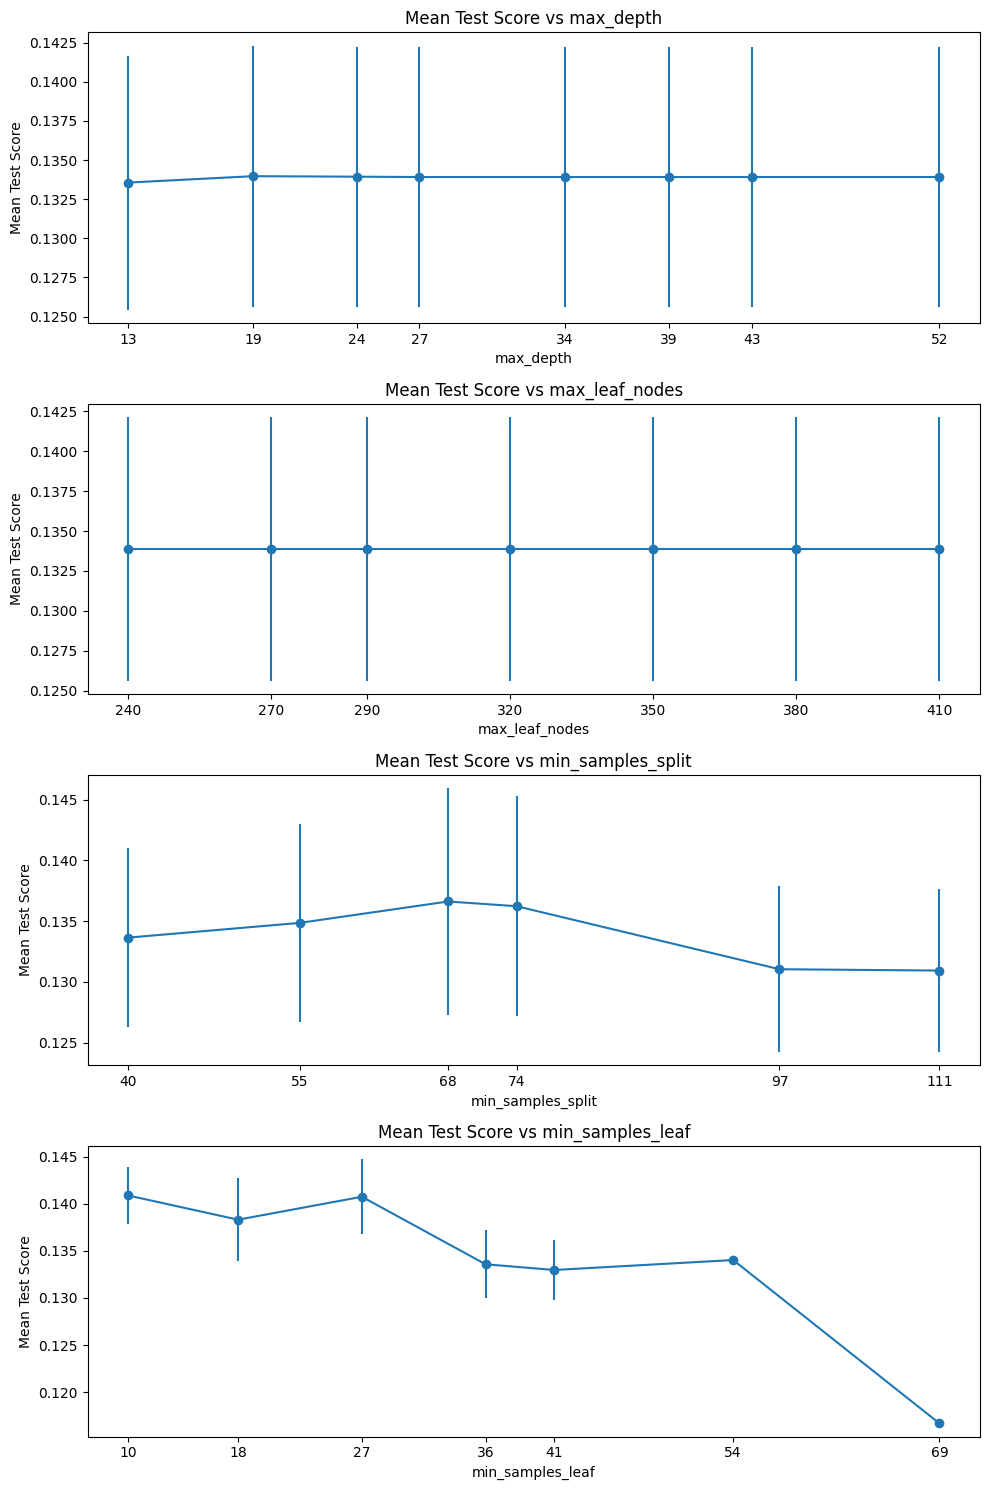

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_cnn['mean_test_score']
params = cv_results_cnn['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


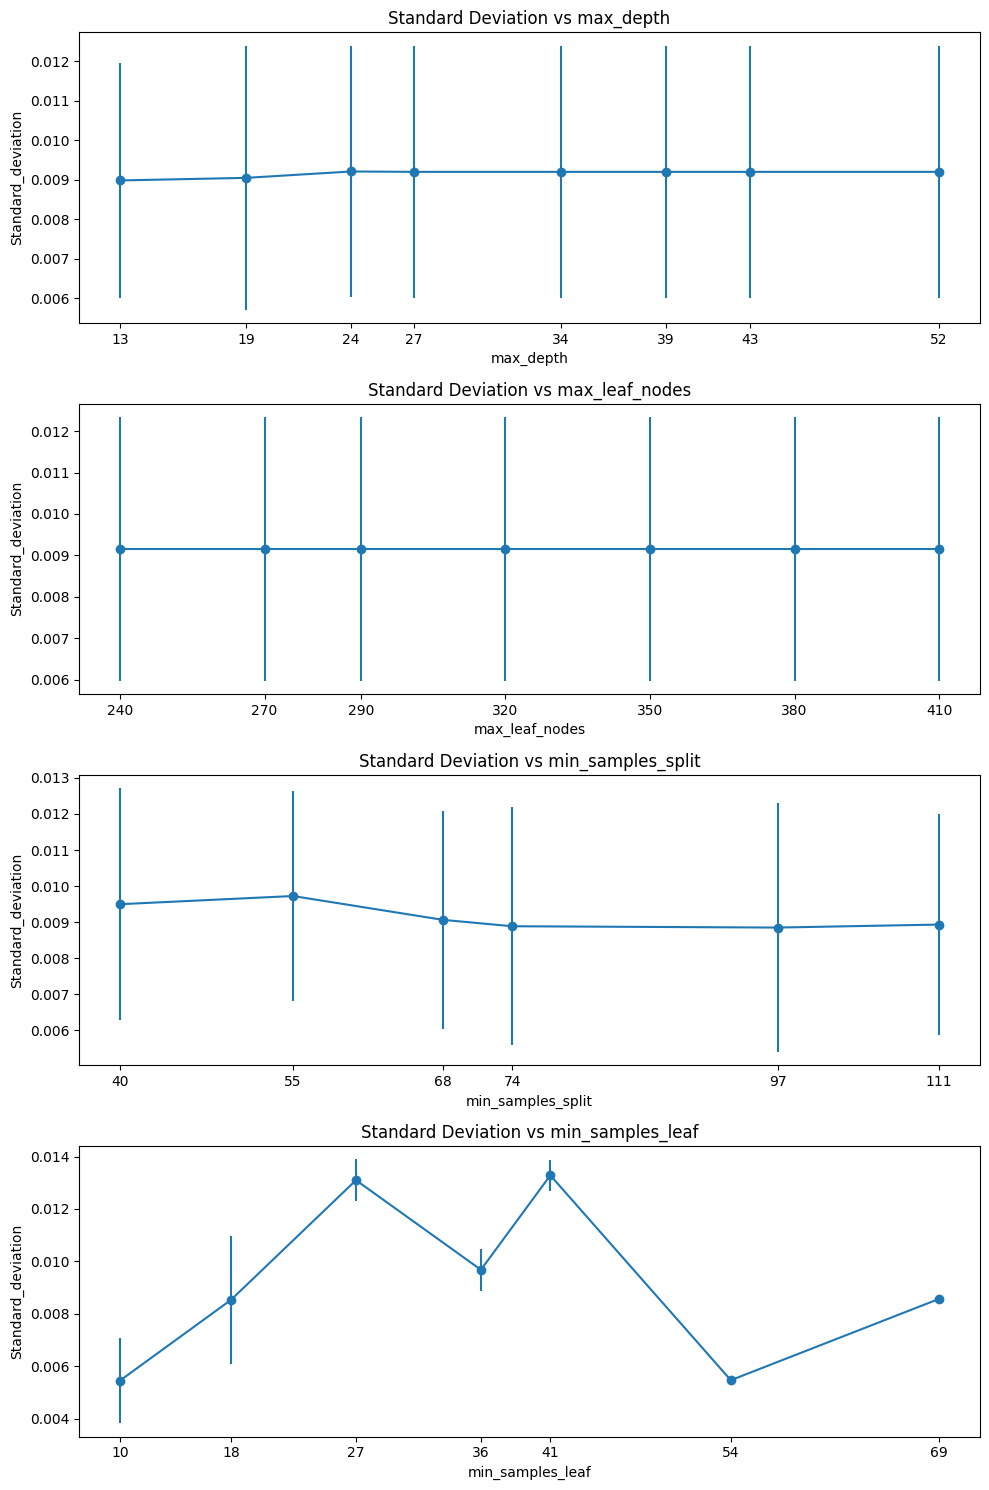

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_cnn['std_test_score']
params = cv_results_cnn['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


<h2>For LBP

In [45]:
X_lbp_train=X_train.iloc[:,2993:3249]
X_train_lbp_arr=X_lbp_train.values
X_train_lbp_scaled = scaler.fit_transform(X_train_lbp_arr)

print(X_train_lbp_scaled.shape)

X_lbp_test=X_test.iloc[:,2993:3249]
X_test_lbp_arr=X_lbp_test.values
X_test_lbp_scaled = scaler.transform(X_test_lbp_arr)

(2211, 255)


In [46]:
#getting the max_depth
model(X_train_lbp_scaled,None,'maxdepth')


Accuracy using feature of maxdepth: 0.024830699774266364
Depth of the decision tree: 104


In [47]:
# Got maximum depth for cnn of the tree as 18
for i in range(1,105,4):
    model(X_train_lbp_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.013544018058690745
Depth of the decision tree: 1
Accuracy using feature of max_depth_5: 0.01805869074492099
Depth of the decision tree: 5
Accuracy using feature of max_depth_9: 0.02708803611738149
Depth of the decision tree: 9
Accuracy using feature of max_depth_13: 0.024830699774266364
Depth of the decision tree: 13
Accuracy using feature of max_depth_17: 0.02708803611738149
Depth of the decision tree: 17
Accuracy using feature of max_depth_21: 0.01580135440180587
Depth of the decision tree: 21
Accuracy using feature of max_depth_25: 0.020316027088036117
Depth of the decision tree: 25
Accuracy using feature of max_depth_29: 0.029345372460496615
Depth of the decision tree: 29
Accuracy using feature of max_depth_33: 0.01805869074492099
Depth of the decision tree: 33
Accuracy using feature of max_depth_37: 0.01805869074492099
Depth of the decision tree: 37
Accuracy using feature of max_depth_41: 0.020316027088036117
Depth of the decision tree: 41


In [48]:
for i in range(2,2211,50):
        model(X_train_lbp_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.013544018058690745
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.02708803611738149
Depth of the decision tree: 14
Accuracy using feature of max_leaf_node 102: 0.024830699774266364
Depth of the decision tree: 33
Accuracy using feature of max_leaf_node 152: 0.029345372460496615
Depth of the decision tree: 33
Accuracy using feature of max_leaf_node 202: 0.03160270880361174
Depth of the decision tree: 40
Accuracy using feature of max_leaf_node 252: 0.024830699774266364
Depth of the decision tree: 42
Accuracy using feature of max_leaf_node 302: 0.02708803611738149
Depth of the decision tree: 54
Accuracy using feature of max_leaf_node 352: 0.03160270880361174
Depth of the decision tree: 57
Accuracy using feature of max_leaf_node 402: 0.029345372460496615
Depth of the decision tree: 70
Accuracy using feature of max_leaf_node 452: 0.022573363431151242
Depth of the decision tree: 78
Accuracy using feature of max_leaf_nod

In [49]:
# for min_sample_split
for i in range(2,2211,50):
    model(X_train_lbp_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.024830699774266364
Depth of the decision tree: 104
Accuracy using feature of min_samples_split 52: 0.024830699774266364
Depth of the decision tree: 83
Accuracy using feature of min_samples_split 102: 0.029345372460496615
Depth of the decision tree: 74
Accuracy using feature of min_samples_split 152: 0.03160270880361174
Depth of the decision tree: 66
Accuracy using feature of min_samples_split 202: 0.029345372460496615
Depth of the decision tree: 58
Accuracy using feature of min_samples_split 252: 0.029345372460496615
Depth of the decision tree: 55
Accuracy using feature of min_samples_split 302: 0.02708803611738149
Depth of the decision tree: 51
Accuracy using feature of min_samples_split 352: 0.024830699774266364
Depth of the decision tree: 39
Accuracy using feature of min_samples_split 402: 0.022573363431151242
Depth of the decision tree: 32
Accuracy using feature of min_samples_split 452: 0.022573363431151242
Depth of the decision tre

In [50]:
# min_samples_leaf
for i in range(1,2211,50):
    model(X_train_lbp_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.024830699774266364
Depth of the decision tree: 104
Accuracy using feature of min_samples_leaf51: 0.020316027088036117
Depth of the decision tree: 10
Accuracy using feature of min_samples_leaf101: 0.01580135440180587
Depth of the decision tree: 7
Accuracy using feature of min_samples_leaf151: 0.011286681715575621
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf201: 0.009029345372460496
Depth of the decision tree: 4
Accuracy using feature of min_samples_leaf251: 0.020316027088036117
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf301: 0.020316027088036117
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf351: 0.024830699774266364
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf401: 0.01580135440180587
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf451: 0.02708803611738149
Depth of the decision tree: 2
Accuracy using feature 

In [51]:
param_grid_lbp={
    'max_depth': [16,23,29,38,67,75],
    'max_leaf_nodes':[350,370,391,410],
    'min_samples_split': [140,162,180,197,220],
    'min_samples_leaf': [10,15,31,50]
}

In [52]:
cv_results_lbp,best_clf_lbp=tuning_model(X_train_lbp_scaled,'lbp_10_50_gd',param_grid_cnn)

Grid Search Results: 
1). Rank_score: 729, Mean accuracy: 0.030, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 40}
2). Rank_score: 113, Mean accuracy: 0.033, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 55}
3). Rank_score: 554, Mean accuracy: 0.030, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 68}
4). Rank_score: 750, Mean accuracy: 0.030, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 74}
5). Rank_score: 946, Mean accuracy: 0.028, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 97}
6). Rank_score: 1240, Mean accuracy: 0.028, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_samples_leaf': 10, 'min_samples_split': 111}
7). Rank_score: 288, Mean accuracy: 0.031, Parameters: {'max_depth': 13, 'max_leaf_nodes': 240, 'min_sampl

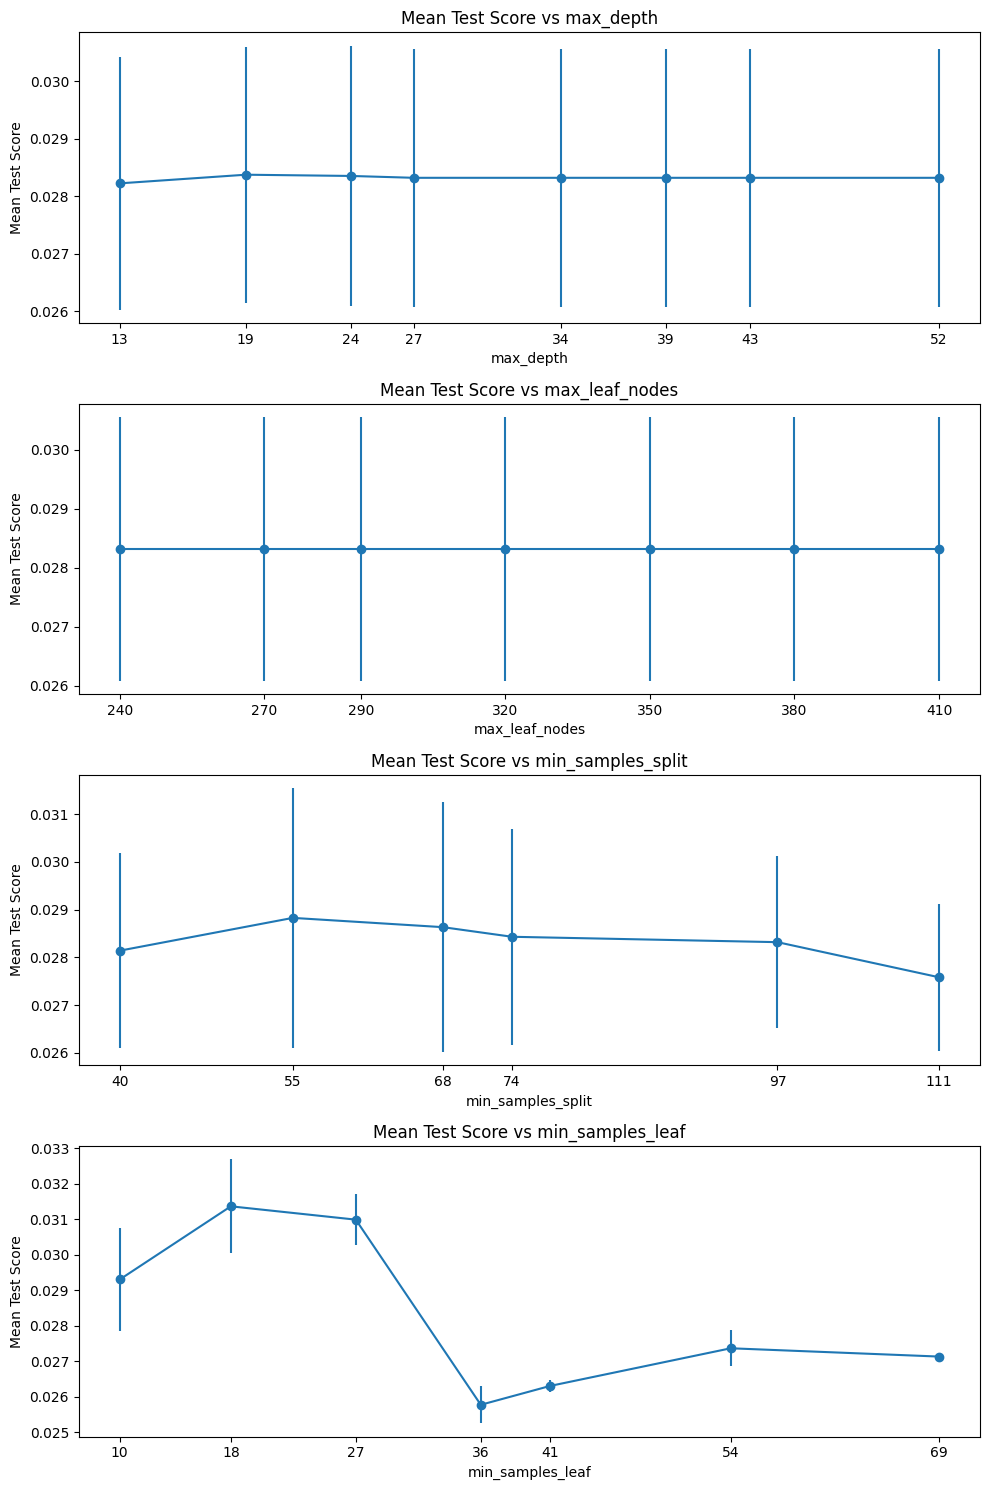

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_lbp['mean_test_score']
params = cv_results_lbp['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


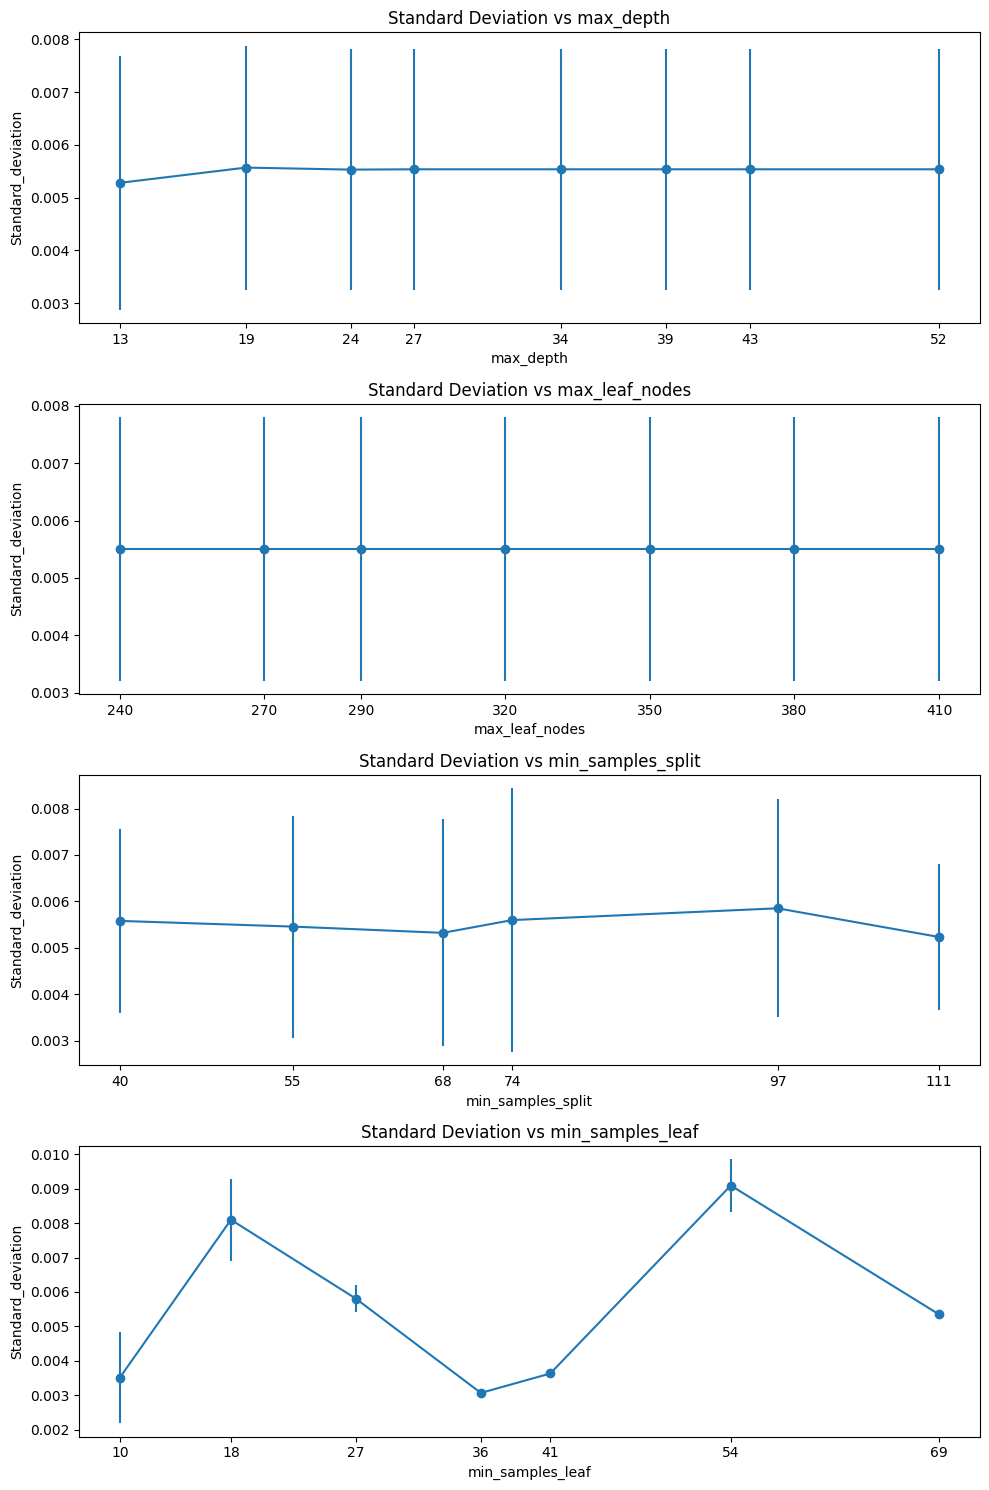

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_lbp['std_test_score']
params = cv_results_lbp['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [55]:
# Testing on the test data:

y_pred_lbp = best_clf_lbp.predict(X_test_lbp_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lbp)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.023508137432188065
